In [48]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [49]:
pred_path = '../_predictions.json'
with open(pred_path) as f:
  data = json.load(f)

In [50]:
areas = []
scores = []
for item in data:
  bbox = item['bbox']
  x,y,ht,wd = bbox
  areas.append(ht*wd)
  score = item['score']
  scores.append(score)


In [51]:
areas = np.array(areas)
scores = np.array(scores)

In [52]:
def plot_average_score_bins(areas, scores, numbins):
  bins = np.linspace(0, np.max(areas), numbins)
  bin_indices = np.digitize(areas, bins)
  mean_scores = []
  bar_titles = []

  for i in range(0, len(bins)-1):
    binned_scores = scores[bin_indices == i+1]
    mean_scores.append(binned_scores.mean())
    score_range = f'{bins[i]:.2f}-{bins[i+1]:.2f}'
    bar_titles.append(score_range)
  plt.figure(figsize=(20,10))
  plt.bar(bar_titles, mean_scores)
  for i, value in enumerate(mean_scores):
      plt.text(i, value+0.001, f"{value:.4f}", ha='center', fontsize=10)

  plt.xticks(rotation=90)
  plt.xlabel("Bin for Bounding Box Size")
  plt.ylabel("Average Score")
  plt.show()


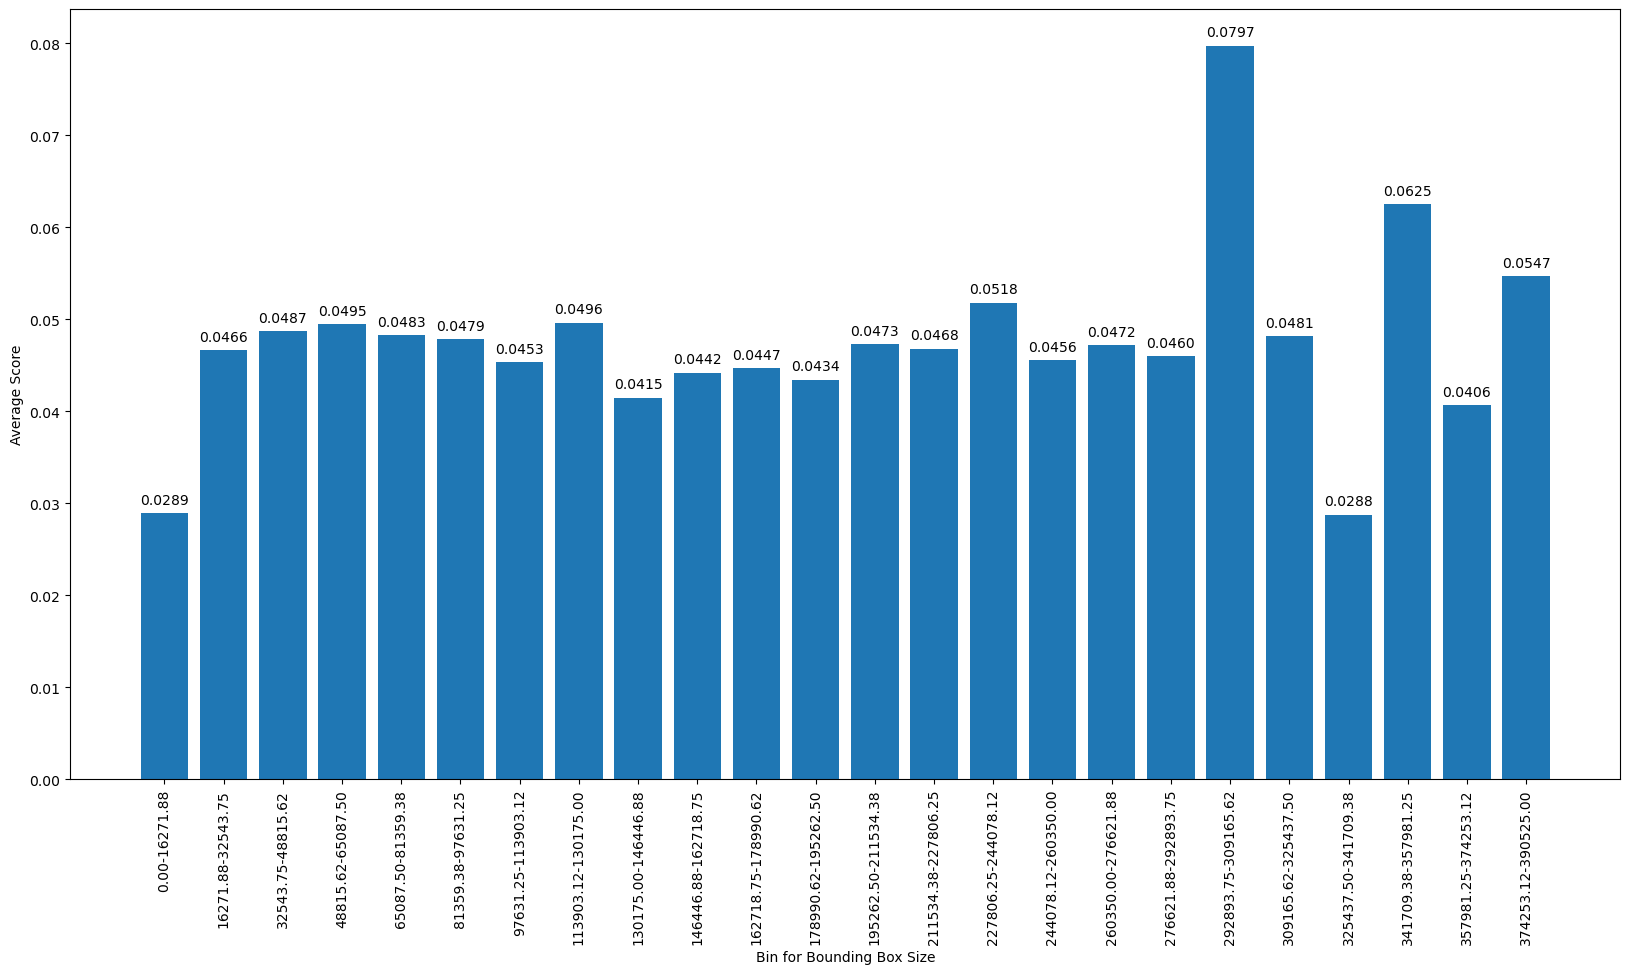

In [53]:
plot_average_score_bins(areas, scores, 25)